## Bachelor Arbeit:

Wie stark sind die Auswirkungen von Transfer Learning bezüglich der Effizienz und Effektivität künstlicher neuronaler Netze anhand des Beispiels Autokennzeichen-Erkennung, wenn die erhebbaren Daten begrenzt sind?
***
How strong is the impact of transfer learning regarding the efficiency and effectiveness of convolutional neural networks, based on the example of detecting vehicle registration plates, assuming working with limited datasets?

#### Requirements
Es kann beim Installieren der Packages zu Kompatibilitätsproblemen kommen. Model Maker benötigt einerseits eine setuptools Version <= 58 (https://stackoverflow.com/questions/69100275/error-while-downloading-the-requirements-using-pip-install-setup-command-use-2) und andererseits unterstützt Model Maker keine Tensorflow Version über 2.9. Sollte eine aktuellere Tensorflow Version installiert sein, muss diese zuerst samt protobuf deinstalliert werden - https://stackoverflow.com/questions/42006320/tensorflow-pip-installation-issue-cannot-import-name-descriptor. Error: pip cannot uninstall 'package': "It is a distutils installed project" kann mittels manuellem Deinstallieren des packages umgangen werden (https://stackoverflow.com/questions/53807511/pip-cannot-uninstall-package-it-is-a-distutils-installed-project).

In [1]:
# install required packages
!pip install --upgrade pip setuptools==58
!pip install fiftyone
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 33.3 MB/s 
     |████████████████████████████████| 816 kB 64.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.0/564.0 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━

### Data

#### Download data
Zuerst werden in den folgenden Codezeilen Trainings-, Test- und Validationsdaten von der Open Images Datenbank (https://storage.googleapis.com/openimages/web/visualizer/index.html?type=detection&set=train&c=%2Fm%2F01jfm_) heruntergeladen. Dazu wird die von Google empfohlene FiftyOne Bibliothek verwendet (https://voxel51.com/docs/fiftyone/, https://voxel51.com/docs/fiftyone/user_guide/dataset_zoo/datasets.html#open-images-v6). Als Trainingsgrundlage werden 500 Bilder mit Autokennzeichen inklusive Ground-Truth Daten und 500 Bilder mit Hunden, Katzen und Äpfel (für die negativen Labels)  geladen. Die Validationsdaten und Testdaten bestehen aus jeweils 100 Bildern.

Die genaue Implementierung ist in dataset.py zu finden.

C:\Users\Benni\.conda\envs\bachelor_thesis\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Necessary images already downloaded
Existing download of split 'train' is sufficient
Loading 'open-images-v6' split 'train'
 100% |█████████████████| 500/500 [495.1ms elapsed, 0s remaining, 1.0K samples/s]       
Dataset 'open-images-v6-train' created
Necessary images already downloaded
Existing download of split 'train' is sufficient
Loading 'open-images-v6' split 'train'
 100% |█████████████████| 500/500 [519.6ms elapsed, 0s remaining, 962.3 samples/s]      
Dataset 'dataset_2' created
 100% |█████████████████| 500/500 [613.4ms elapsed, 0s remaining, 815.1 samples/s]      
Necessary images already downloaded
Existing download of split 'test' is sufficient
Loading 'open-images-v6' split 'test'
 100% |███████████████████| 50/50 [83.7ms elapsed, 0s remaining, 597.6 samples/s]  
Dataset 'open-images-v6-test' created
Necessary images already downloaded
Existing download of split 'test' is sufficient
Loading 'open-images-v6' split 'test'
 100% |███████████████████| 50/50 [74.0ms elapsed, 0

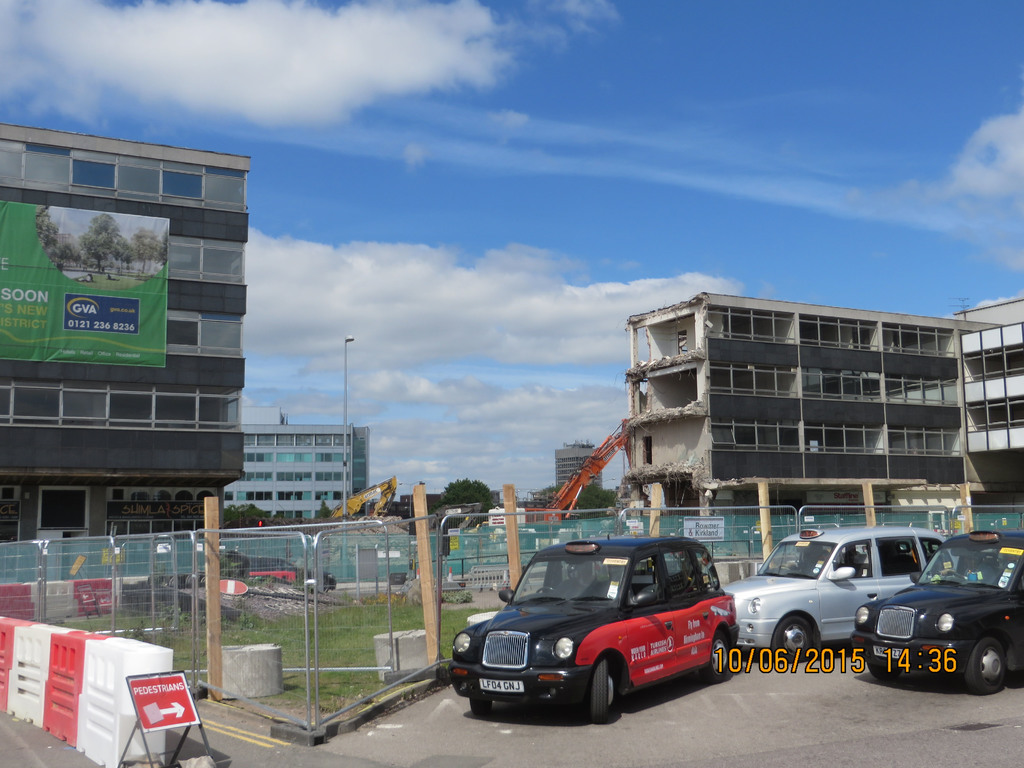

In [1]:
import dataset as Data
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
    
# download data from Open Image Dataset V6
train_dataset = Data.load_fiftyone_dataset("train")
test_dataset = Data.load_fiftyone_dataset("test")
val_dataset = Data.load_fiftyone_dataset("validation")

print("-----------------------------------------------------")
print(train_dataset.count())
print(test_dataset.count())
print(val_dataset.count())
print("First image of train_dataset: \n"
      "Filepath: ", train_dataset.first().filepath)
array_to_img(load_img(train_dataset.first().filepath))

#### Data preprocessing

Um die Daten in das CNN von Googles TensorFlow Lite Model Maker Bibliothek und in das selbst implementierte neuronale Netz füttern zu können, müssen sie zuerst angepasst werden:

1.0) Als erstes werden die Klassifikationslabels der Bilder der Datensätze in numpy arrays mit int64 Werten konvertiert.

2.0) Die Model Maker Bibliothek erwartet Daten im Format der internen DataLoader Klasse (https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/DataLoader). Nachdem diese Schnittstelle keine numpy Arrays unterstützt, wurde in dataset.py eine Methode zur Konvertierung der Arrays in das gewünschte Format implementiert. Dazu wurden Codepassagen aus der DataLoader GitHub Repository genommen: https://github.com/tensorflow/examples/blob/master/tensorflow_examples/lite/model_maker/core/data_util/image_dataloader.py?utm_source=www.tensorflow.org&utm_medium=referral#L53-L106.

3.0) Wie in der API Dokumentation der TensorFlow Lite Model Maker Bibliothek festgehalten wird (https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier), benützt Model Maker per default ein vortrainiertes EfficientNet-Lite0 Model. Dieses Model ist ein für mobile Geräte optimiertes neuronales Netzwerk, ideal für Edge Computing, und spiegelt den Anwendungsfall dieser Arbeit somit sehr gut wider. In weiterer Folge wird jedoch nicht EfficientNet-Lite0 sondern die Weiterentwicklung EfficientNet-Lite4 verwendet. Dieses Netz ist zwar etwas langsamer als sein Vorgänger, erreicht dafür jedoch höhere Trefferquoten. Zudem ist das CNN immer noch für mobile Anwendungen optimiert und der Geschwindigkeitsverlust ist verkraftbar. Genaueres kann in der Dokumentation nachgelesen werden: https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite?utm_source=www.tensorflow.org&utm_medium=referral.

EfficientNet-Lite4 unterstützt Eingabebilder des Formates (224, 224, 3) und Bildwerte im Bereich -1 bis 1. Um möglichst repräsentative Vergleichswerte für die 2 Models zu erhalten, müssen die Daten des neu aufgesetzen neuronalen Netzes an die Vorgaben des durch Model Maker trainierten CNNs angepasst werden. Folglich werden die Bilder der Datensätze an dieses Format angepasst und die Bildwerte von einem 0-255 Zahlenraum in Gleitkommazahlen zwischen 0-1 skaliert.

First 10 labels of y_train:  [1 0 1 0 0 0 0 1 1 0]
X_train[0].shape:  (224, 224, 3)


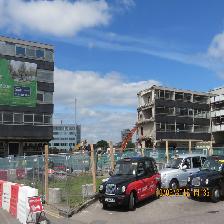

In [2]:
# 1) load training, test and validation ground_truth of dataset detection labels
y_train = Data.load_datasetLabels_into_npArray(train_dataset)
y_test = Data.load_datasetLabels_into_npArray(test_dataset)
y_val = Data.load_datasetLabels_into_npArray(val_dataset)

print("First 10 labels of y_train: ", y_train[:10])

# 2) prepare transfer learning data
#convert training, test and validation data to Model Maker's image_classifier.Dataloader format
''' labels still have the wrong format and therefor transfer learning is not working properly '''
train_data = Data.load_datasetImages_and_Labels_into_DataLoader(train_dataset, y_train)
test_data = Data.load_datasetImages_and_Labels_into_DataLoader(test_dataset, y_test)
val_data = Data.load_datasetImages_and_Labels_into_DataLoader(val_dataset, y_val)

# 3) prepare data for training custom model
#load training, test and validation images in IMG_DIM format and scale to 0 - 1 float32
X_train = Data.load_datasetImages_into_npArray(train_dataset)
X_test = Data.load_datasetImages_into_npArray(test_dataset)
X_val = Data.load_datasetImages_into_npArray(val_dataset)

print("X_train[0].shape: ", X_train[0].shape)
array_to_img(X_train[0])

### Convolutional Neural Networks

#### Transfer Learning ("EfficientNet-Lite4" model)

In folgendem Codeabschnitt werden die "batch_size" und die "epochs" gesetzt. Die batch size definiert wie viele Bilder an das neuronale Netz pro Wiederholung übergeben werden. Dabei beschreibt eine Wiederholung das Zeitintervall für die Anpassung der Gewichte eines neuronalen Netzes. Eine batch size von 10 gibt also an, dass nach 10 Bildern die Gewichte angepasst werden. Der Trainingsdatensatz beinhaltet 320 Bilder. Eine sogenannte Epoche beinhaltet also 32 Wiederholungen/Batches, sprich 32 Gewichtsanpassungen. Mehrere "epochs" definieren die Anzahl der Wiederholungen eines Datensatzes. Ein Wert von 30 bedeutet somit insgesamt 32x30 Batches/Gewichtsanpassungen.

Die TensorFlow Lite Model Maker Bibliothek bietet die Option eines integrierten "image augmentation" Algorithmuses. Dieser Schritt ist eine übliche Vorgehensweise, wenn die Daten begrenzt sind. Bilderweiterung erlaubt es durch Diversifizierung (Abändern der Bildparameter wie die Drehung des Bildes, das Format,...) ein Model mit mehreren unterschiedlichen Samples zu füttern und somit das Risiko von Overfitting zu minimieren. Durch das Setzen des use_augmentation Flags wird der Algorithmus aktiviert.

In [4]:
import tensorflow as tf
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
# number of images passed to the CNN in one iteration (weights are updated after one iteration)
batch_size = 30
# number of iterations over the whole dataset (high number will result in overfitting)
epochs = 10

#TODO optimize method parameters - dropout_rate, learning_rate
tflite_model = image_classifier.create(
    train_data,
    #validation_data=val_data,
    model_spec=model_spec.get('efficientnet_lite4'),
    #train_whole_model=True,
    #batch_size=batch_size,
    #epochs=epochs,
    shuffle=True,
    use_augmentation=True
)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             11837936  
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 11,840,498
Trainable params: 2,562
Non-trainable params: 11,837,936
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/5


C:\Users\Benni\.conda\envs\bachelor_thesis\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


31/31 [==============================] - 51s 2s/step - loss: 0.4835 - accuracy: 0.8004
Epoch 2/5
31/31 [==============================] - 43s 1s/step - loss: 0.5013 - accuracy: 0.8427
Epoch 3/5
31/31 [==============================] - 41s 1s/step - loss: 0.4743 - accuracy: 0.8498
Epoch 4/5
31/31 [==============================] - 41s 1s/step - loss: 0.4678 - accuracy: 0.8599
Epoch 5/5
31/31 [==============================] - 41s 1s/step - loss: 0.4675 - accuracy: 0.8548


In [5]:
# Export to Tensorflow Lite model and label file in `export_dir`.
#config = QuantizationConfig.for_float16()
tflite_model.export(export_dir='./models/transfer_learning', tflite_filename='tl_model.tflite')#, quantization_config=config)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Assets written to: C:\Users\Benni\AppData\Local\Temp\tmpif5menvp\assets


INFO:tensorflow:Assets written to: C:\Users\Benni\AppData\Local\Temp\tmpif5menvp\assets
C:\Users\Benni\.conda\envs\bachelor_thesis\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\Benni\AppData\Local\Temp\tmpzmnd14ml\labels.txt


INFO:tensorflow:Saving labels in C:\Users\Benni\AppData\Local\Temp\tmpzmnd14ml\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./models/transfer_learning\tl_model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./models/transfer_learning\tl_model.tflite


In [7]:
#TODO load model and evaluate accuracy
loss, accuracy = tflite_model.evaluate(test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


4/4 [==============================] - 5s 1s/step - loss: 0.7003 - accuracy: 0.6700


In [8]:
tflite_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             11837936  
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 11,840,498
Trainable params: 2,562
Non-trainable params: 11,837,936
_________________________________________________________________


#### Training CNN from scratch

Da das Ergebnis der beiden neuronalen Netze möglichst vergleichbar sein soll, wird auf Basis des ImageDataGenerator der Keras Bibliothek (ein Algorithmus zur zufälligen Bildgenerierung: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html, Dokumentation: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) der Datensatz wie beim Transfer Learning erweitert. Zudem wird auf dieselben "batch_size" und "epochs" Werte zurückgegriffen.

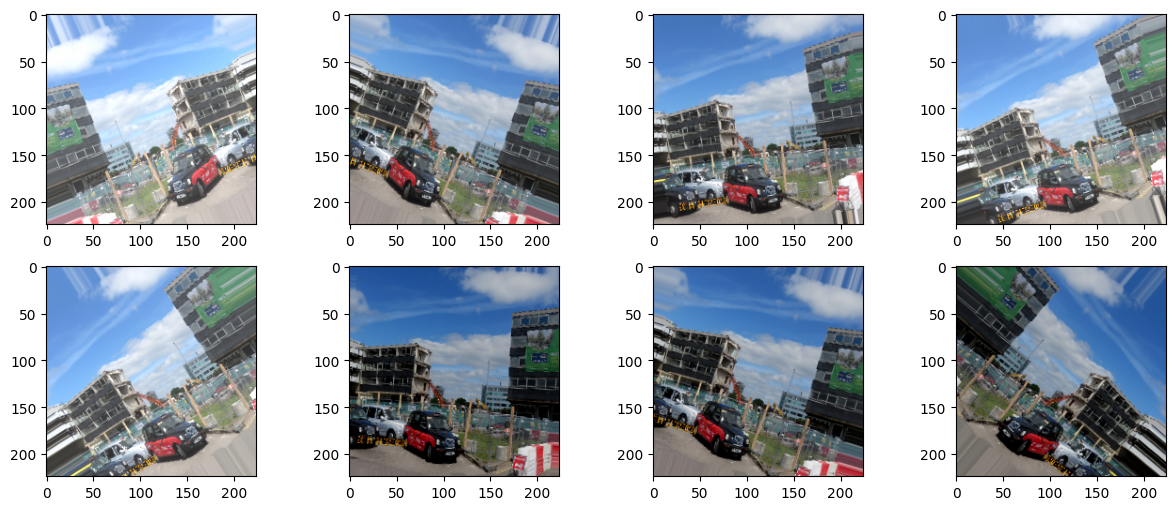

In [17]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# image augmentation
datagen = ImageDataGenerator(rotation_range=40, shear_range=0.2, channel_shift_range=0.2,
                                     horizontal_flip=True, fill_mode='nearest')

# plot 8 example images of X_train[0]
generator = datagen.flow(X_train[:1], y=y_train[:1])
image = [next(generator) for i in range(8)]
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
l = [ax[j][i].imshow(image[i+j*4][0][0]) for i in range(4) for j in range(2)]

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

# TODO: optimize CNN
#https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'])

# TODO: missing image augmentation
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs)
'''
history = model.fit_generator(
    #tf.data.Dataset.from_tensor_slices(datagen.flow(X_train, y=y_train)),
    train_dataset,
    steps_per_epoch=30,
    epochs=30,
    validation_data=val_dataset,
    validation_steps=30)
'''

# TODO: save model as h5?

Epoch 1/30


C:\Users\Benni\.conda\envs\bachelor_thesis\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


34/34 [==============================] - 17s 493ms/step - loss: 1.1418 - accuracy: 0.6760 - val_loss: 0.7203 - val_accuracy: 0.6400
Epoch 2/30
34/34 [==============================] - 17s 489ms/step - loss: 0.6154 - accuracy: 0.7100 - val_loss: 0.6536 - val_accuracy: 0.6400
Epoch 3/30
34/34 [==============================] - 17s 488ms/step - loss: 0.5752 - accuracy: 0.7190 - val_loss: 0.5331 - val_accuracy: 0.7000
Epoch 4/30
34/34 [==============================] - 17s 486ms/step - loss: 0.5600 - accuracy: 0.7230 - val_loss: 0.4573 - val_accuracy: 0.8000
Epoch 5/30
34/34 [==============================] - 16s 485ms/step - loss: 0.5051 - accuracy: 0.7860 - val_loss: 0.4713 - val_accuracy: 0.7800
Epoch 6/30
34/34 [==============================] - 16s 485ms/step - loss: 0.4825 - accuracy: 0.7910 - val_loss: 0.3991 - val_accuracy: 0.8000
Epoch 7/30
34/34 [==============================] - 16s 485ms/step - loss: 0.4621 - accuracy: 0.8020 - val_loss: 0.4974 - val_accuracy: 0.7500
Epoch 8/30

'\nhistory = model.fit_generator(\n    #tf.data.Dataset.from_tensor_slices(datagen.flow(X_train, y=y_train)),\n    train_dataset,\n    steps_per_epoch=30,\n    epochs=30,\n    validation_data=val_dataset,\n    validation_steps=30)\n'

In [13]:
model.save('./models/own_model.h5')

### Evaluation

In [17]:
# TODO: load both models and evaluate + rename variables
own_model = tf.keras.models.load_model('./models/own_model.h5')
own_model.summary()

#loss, accuracy = tl_model.evaluate_tflite('tl_model.tflite', test_data)
loss, accuracy = own_model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0